## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,84
4,2008-08-01 00:00:00,python,124


In [4]:
df.tail()

,DATE,TAG,POSTS
2169,2021-08-01 00:00:00,perl,135
2170,2021-08-01 00:00:00,r,4791
2171,2021-08-01 00:00:00,php,5479
2172,2021-08-01 00:00:00,swift,2362
2173,2021-08-01 00:00:00,ruby,532


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
df.shape

(2174, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [7]:
df.count()

DATE     2174
TAG      2174
POSTS    2174
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [12]:
df[['TAG', 'POSTS']].groupby('TAG').sum()

,POSTS
TAG,
assembly,38432
c,363727
c#,1494768
c++,735424
delphi,48457
go,55807
java,1795094
javascript,2262504
perl,65853


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [13]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,157,157
c,157,157
c#,158,158
c++,157,157
delphi,157,157
go,142,142
java,157,157
javascript,157,157
perl,157,157


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [3]:
pd.to_datetime(df['DATE'][1])

Timestamp('2008-08-01 00:00:00')

In [4]:
type(pd.to_datetime(df['DATE'][1]))

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,84
4,2008-08-01,python,124


# Pivot method practice

In [23]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu'],
                        'Power': [100, 80, 25, 50, 99, 75, 5]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5


In [24]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75.0,99.0,5.0,NaN
Young,80.0,100.0,25.0,50.0


## Data Manipulation



In [7]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [26]:
reshaped_df.shape

(158, 14)

In [27]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [31]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,84.0,507.0,164.0,14.0,NaN,222.0,163.0,28.0,160.0,124.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


In [32]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2021-04-01,344.0,2461.0,6781.0,4353.0,186.0,685.0,9534.0,18701.0,143.0,5123.0,26574.0,5617.0,605.0,2533.0
2021-05-01,327.0,2264.0,6585.0,4606.0,179.0,701.0,9725.0,18500.0,123.0,5102.0,26148.0,5405.0,448.0,2213.0
2021-06-01,285.0,2013.0,6473.0,4201.0,133.0,649.0,9275.0,17740.0,157.0,4907.0,24652.0,4961.0,470.0,2129.0
2021-07-01,200.0,1732.0,5988.0,3828.0,148.0,655.0,8434.0,17533.0,140.0,4676.0,24319.0,4695.0,502.0,2287.0
2021-08-01,191.0,1782.0,6593.0,3945.0,143.0,912.0,8861.0,18566.0,135.0,5479.0,25373.0,4791.0,532.0,2362.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [33]:
reshaped_df.count()

TAG
assembly      157
c             157
c#            158
c++           157
delphi        157
go            142
java          157
javascript    157
perl          157
php           157
python        157
r             155
ruby          157
swift         149
dtype: int64

In [34]:
reshaped_df.fillna(0, inplace=True)

In [35]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,84.0,507.0,164.0,14.0,0.0,222.0,163.0,28.0,160.0,124.0,0.0,71.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1989.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,503.0,452.0,1.0,159.0,0.0


In [36]:
# Here we are using the .isna() method that we've used before, but we're chaining two more things: 
# the values attribute and the any() method. This means we don't have to search through the entire DataFrame to spot if .isna() is True.

reshaped_df.isna().values.any()

False

## Data Visualisaton with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

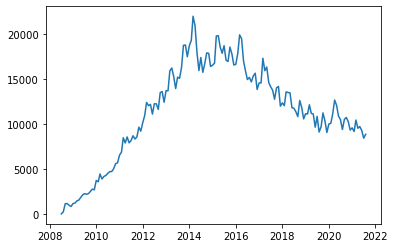

In [42]:
plt.plot(reshaped_df.index, reshaped_df['java'])

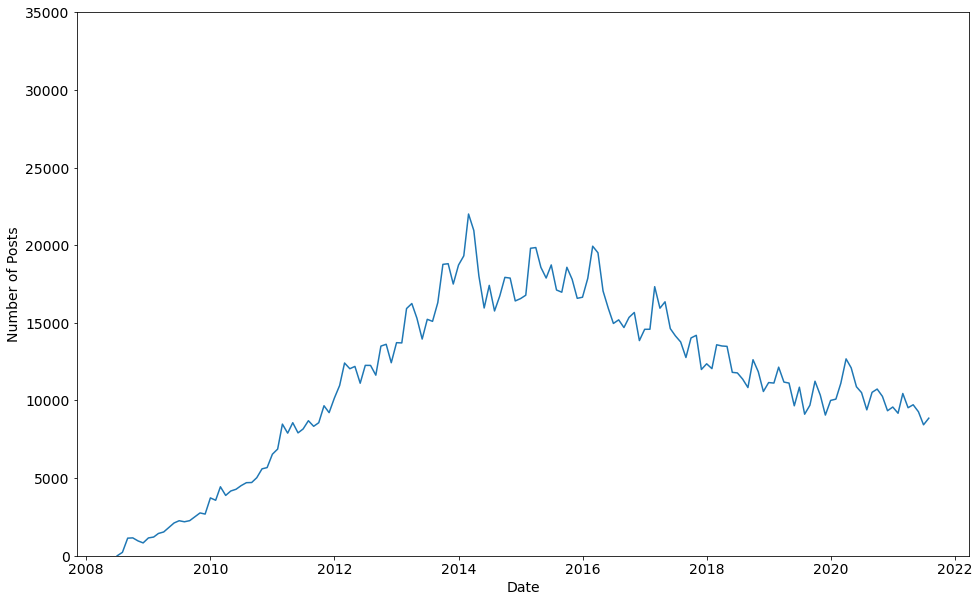

In [47]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

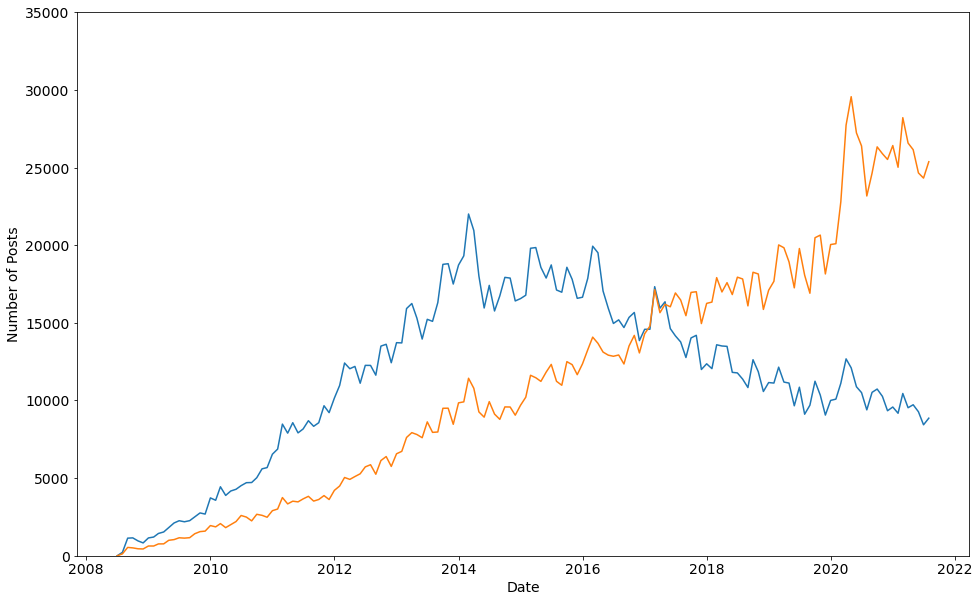

In [49]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df[['java', 'python']])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

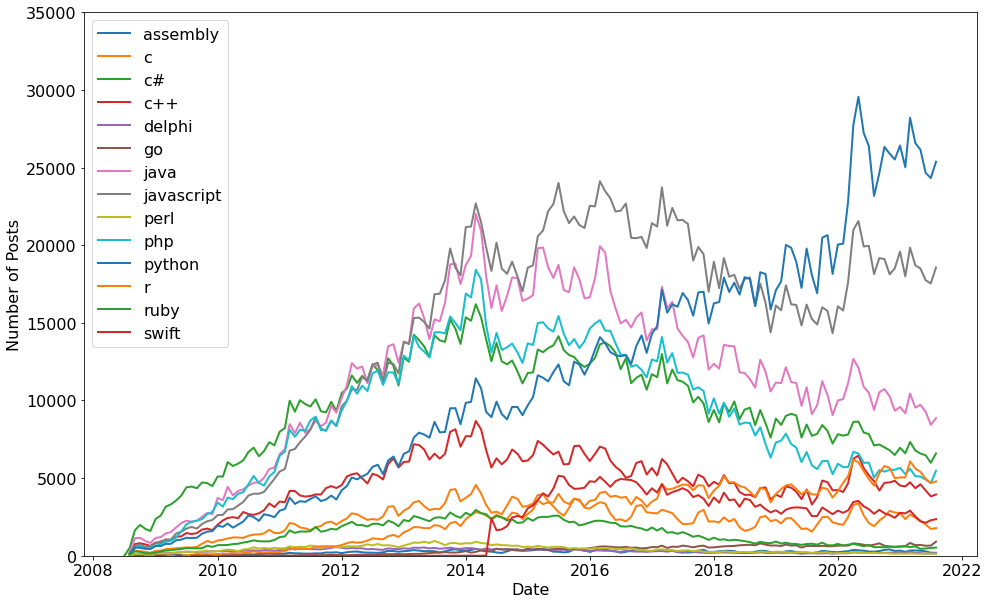

In [13]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0, 35000)
for column in reshaped_df:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=2, label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

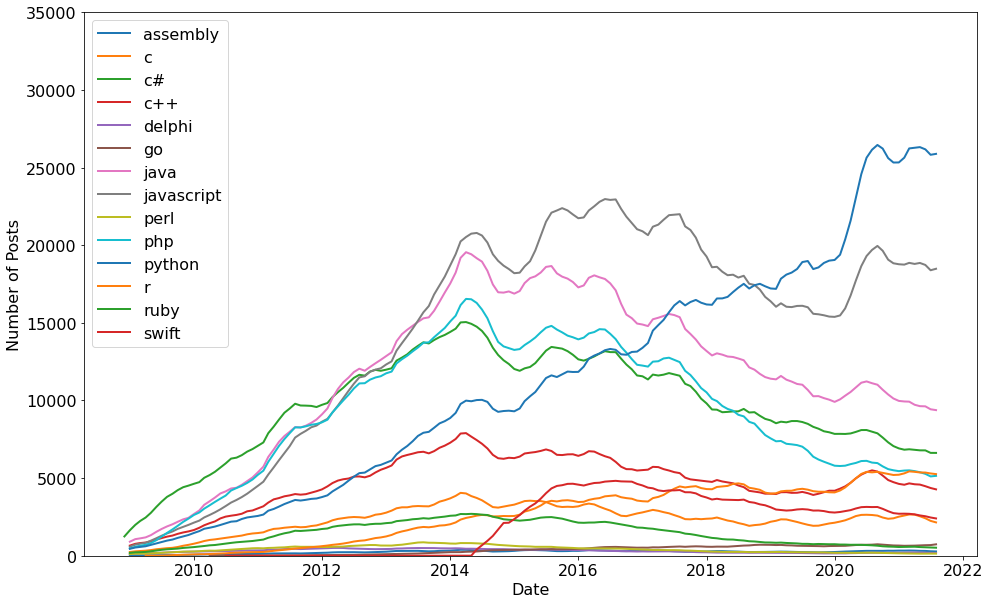

In [17]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Posts', fontsize=16)
plt.ylim(0,35000)
for column in roll_df:
    plt.plot(roll_df.index, roll_df[column], linewidth=2, label=roll_df[column].name)
plt.legend(fontsize=16)